# Plot Population Densities of the Counties and the Districts
Read the file ["Readme.ipynb"](Readme.ipynb) for more information.

## Prepare Modules and Data

In [1]:
# Used to cast the polygons into np.arrays to transpose them easily with the .T function
import numpy as np
import matplotlib.pyplot as plt    # to plot the counties
# Used to determine which part of the plot should be saved
from matplotlib.transforms import Bbox
# Used to navigate the directories and check for files
import os
# backup directory of this file, because the working directory is changed to save files
plot_counties_and_districts_directory = os.getcwd()

In [2]:
os.chdir("..")   # move one directory up
%run color_scheme.ipynb
os.chdir("collect_data")   # move to the cllect_data directory
%run get_data.ipynb
os.chdir(plot_counties_and_districts_directory)    # return to original directory

Polished county data from file is ready to go!
Polished covid19 data from file is ready to go!


### Plot the Population Density
Generates a plot of the population densities of the counties and the districts. The plots contain a plot showing the distribution and a map of Germany showing the spacial distribution. The two images are saved in the result folder two directories above this file.
#### Population density in the counties
At the end the population densities are plotted on the left side two dimensional as a sorted list to see how many districts have which population density and on the right side as a map of Germany to show their spacial distribution.

In [3]:
def sort_AdmUnitIDs_by_AdmUnitID_districts():
    districtIDs = [e for e in districts.keys()]
    districtIDs.sort()
    return districtIDs

In [4]:
def sort_AdmUnitIDs_by_AdmUnitID_counties():
    AdmUnitIDs = [e for e in covid19.keys()]
    AdmUnitIDs.sort()
    return AdmUnitIDs

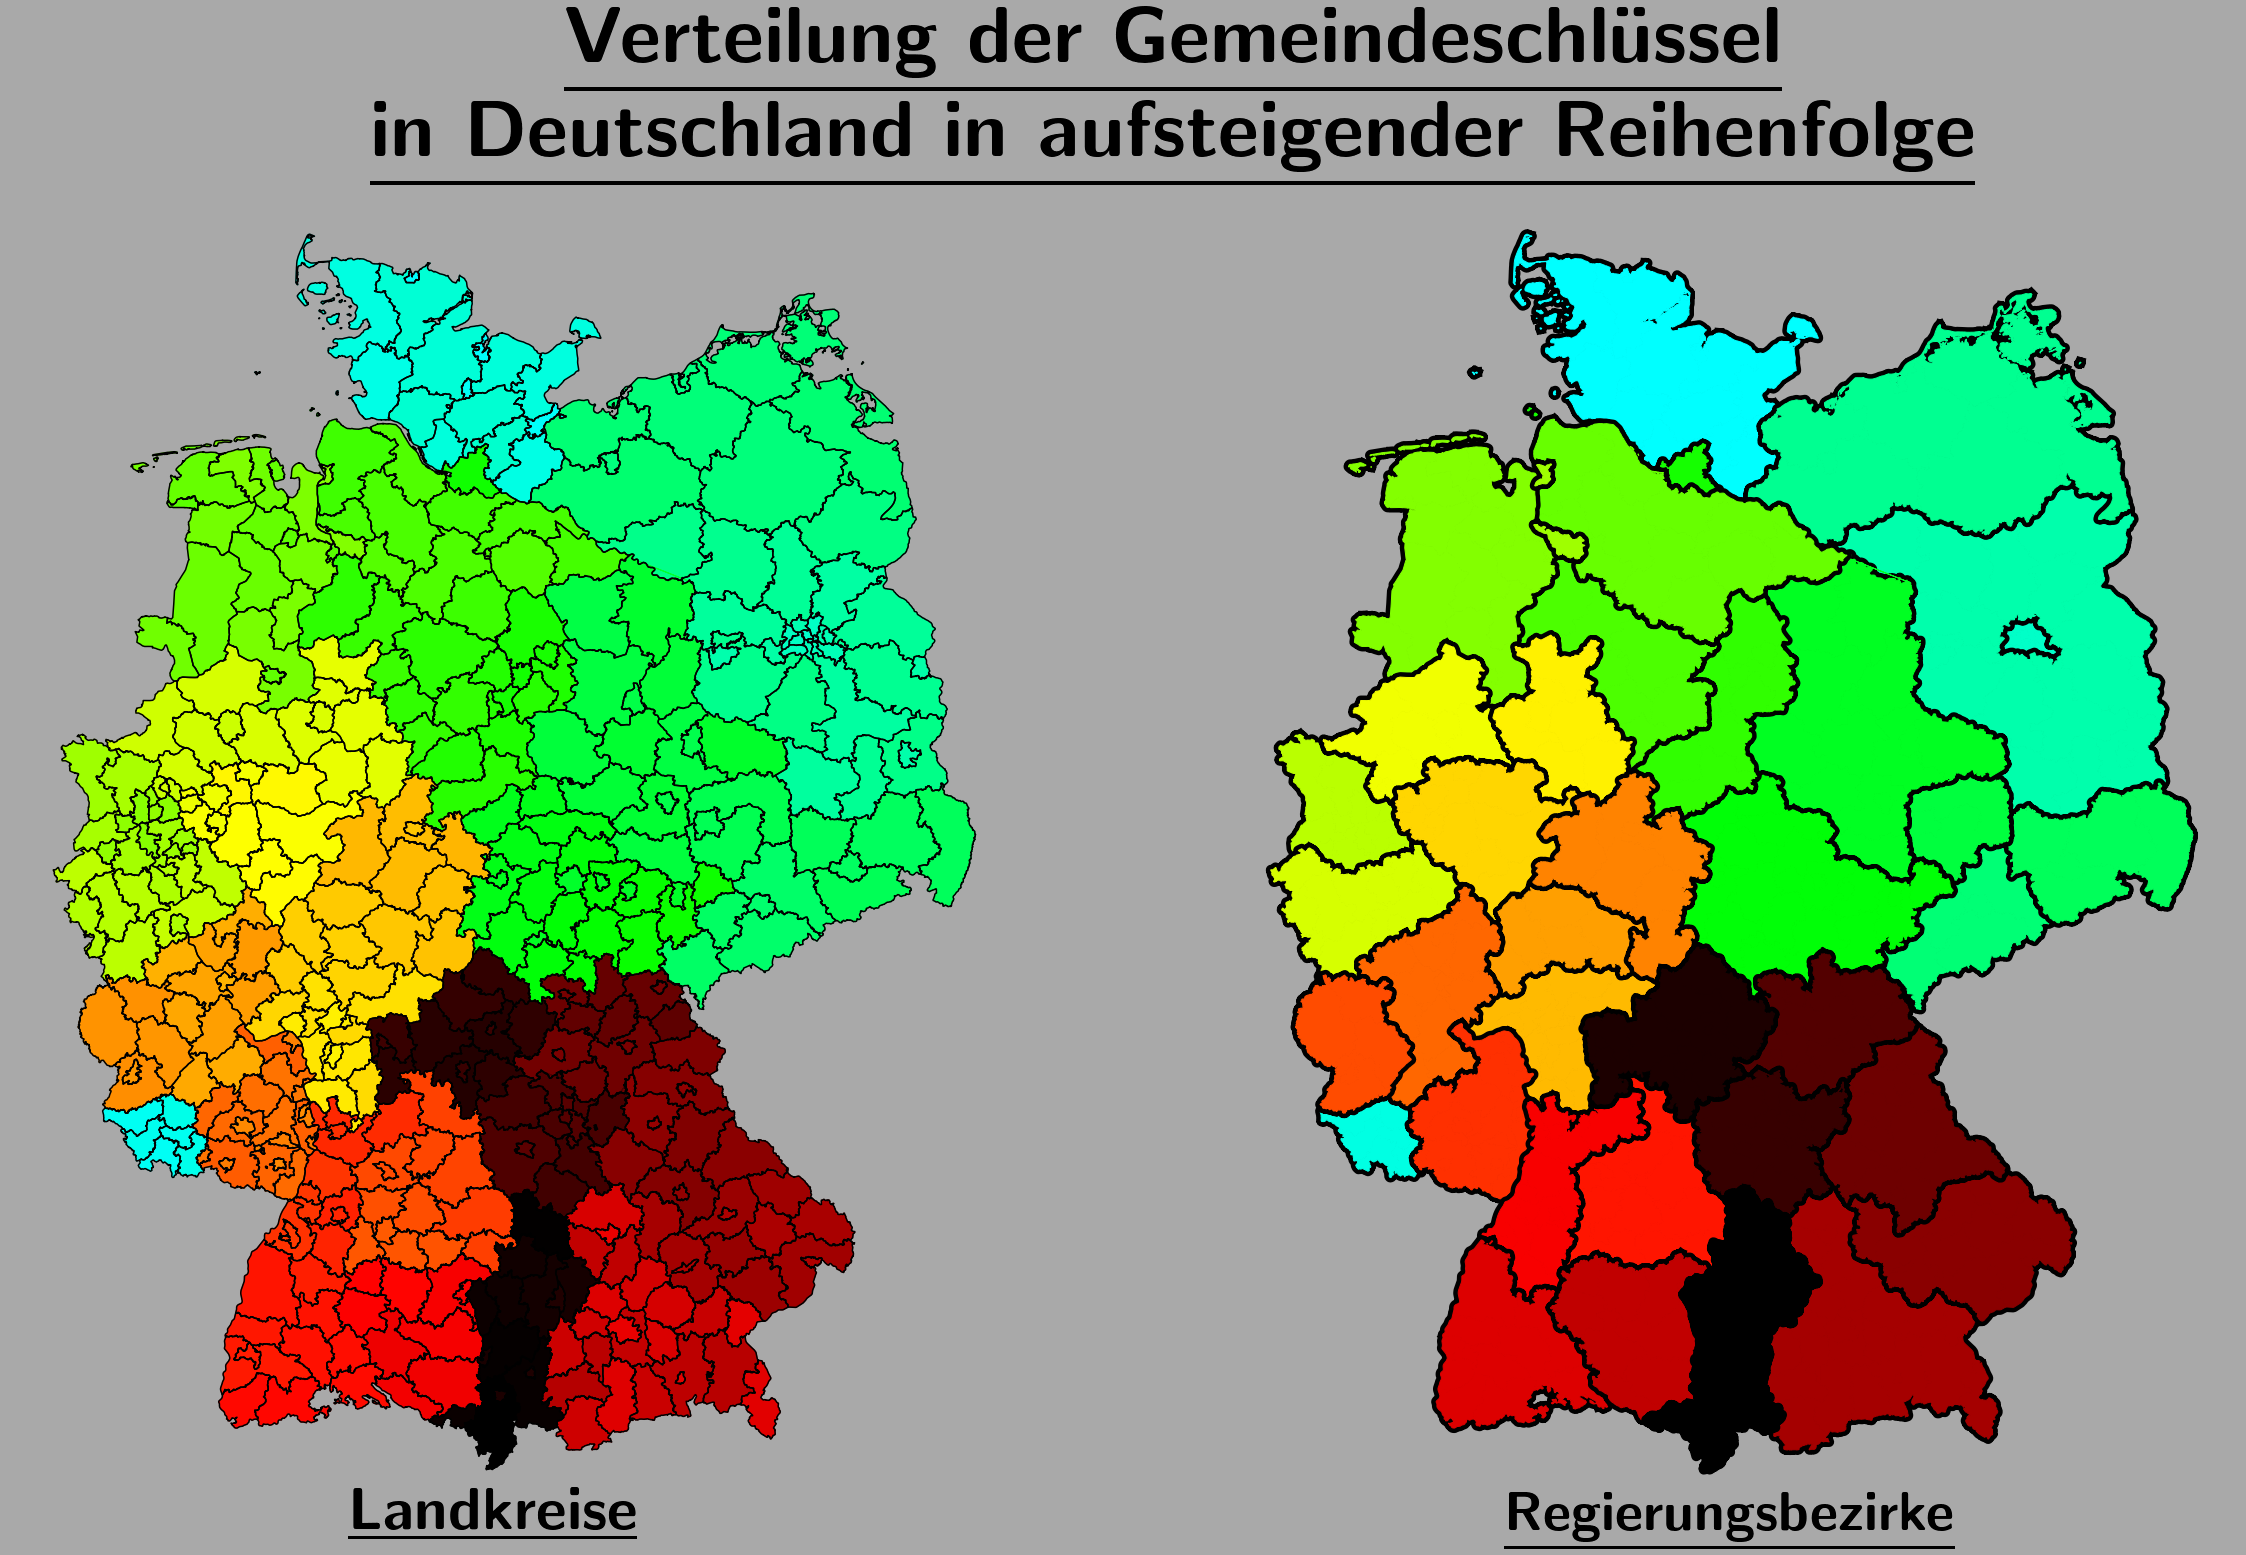

In [5]:
fig, ax = plt.subplots(1, 2, figsize = (40, 25), facecolor='darkgrey')
ax[0].text(17,55.55,r"\textbf{\underline{Verteilung der Gemeindeschlüssel}}" + "\n"+ 
           r"\textbf{\underline{in Deutschland in aufsteigender Reihenfolge}}",
           fontsize=80, usetex=True,
           horizontalalignment='center',
           multialignment='center'
          )
ax[0].text(8.8,46.9,r"\textbf{\underline{Landkreise}}",
           fontsize=60, usetex=True)
ax[0].text(20.3,46.9,r"\textbf{\underline{Regierungsbezirke}}",
           fontsize=55, usetex=True)

axis = ax[0]
axis.set_axis_off()
axis.axes.get_xaxis().set_visible(False)
axis.axes.get_yaxis().set_visible(False)
AdmUnitIDs = sort_AdmUnitIDs_by_AdmUnitID_counties()
i = 0
for county in AdmUnitIDs:
    for polygon in counties_geography[county]['raw_geometry']:
        x,y = np.array(polygon).T
        axis.plot(x, y, color="black")
    for polygon in counties_geography[county]['geometry']:
        x,y = np.array(polygon).T
        axis.fill(x, y, color=color_scheme(
            i,[e for e in range(len(AdmUnitIDs))]))
    i += 1

axis = ax[1]
axis.set_axis_off()
axis.axes.get_xaxis().set_visible(False)
axis.axes.get_yaxis().set_visible(False)
districtIDs = sort_AdmUnitIDs_by_AdmUnitID_districts()
i = 0
for districtID in districtIDs:
    for county in districts[districtID]['counties']:
        for polygon in counties_geography[county]['raw_geometry']:
            x,y = np.array(polygon).T
            axis.plot(x, y, linewidth=10, color="black", zorder=i+2)
        for polygon in counties_geography[county]['geometry']:
            x,y = np.array(polygon).T
            axis.fill(x, y, zorder=i+3, color=color_scheme(
                i,[e for e in range(len(districtIDs))]))
    i += 1

os.chdir(".."), os.chdir("..")    # move to correct directory
# check if the needed directory is available - otherwise create it
if not(os.path.isdir("results")): os.makedirs("results")
if not(os.path.isdir("results/Ergebnisse")): os.makedirs("results/Ergebnisse")
plt.savefig("results/Ergebnisse/districts_and_counties_by_AdmUnitID.png",
            facecolor="darkgrey", bbox_inches=Bbox([[5,2.5],[36.4,25]]))
os.chdir(plot_counties_and_districts_directory)    # return to original directory